In [1]:
draft_mode = False
from front_matter import *
import matplotlib as mpl
import nbinteract as nbi
from ipywidgets import *
import matplotlib.pyplot as plt
%matplotlib notebook

First, load some Python packages.

In [2]:
import numpy as np # for numerics
import sympy as sp # for symbolics
import control as c # the Control Systems module!

In [3]:
S,kp,ki,kd = sp.symbols('S kp ki kd')

In [4]:
G_sym = 15000/(S**4+50*S**3+875*S**2+6250*S+15000)

In [5]:
s = c.TransferFunction.s

In [6]:
def sym_to_tf(tf_sym,s_var):
    S = s_var
    s = sp.symbols('s')
    tf_sym = tf_sym.subs(S,s)
    tf_str = str(tf_sym)
    s = c.TransferFunction.s
    ldict = {}
    exec('tf_out = '+tf_str,globals(),ldict)
    tf_out = ldict['tf_out']
    return tf_out

In [7]:
def pid_CL_tf(plant_tf,Kp=0,Ki=0,Kd=0):
    s = c.TransferFunction.s
    C_pid_tf = Kp + Ki/s + Kd*s
    return c.feedback(C_pid_tf*plant_tf)

In [8]:
G_tf = sym_to_tf(G_sym,S)

<IPython.core.display.Javascript object>


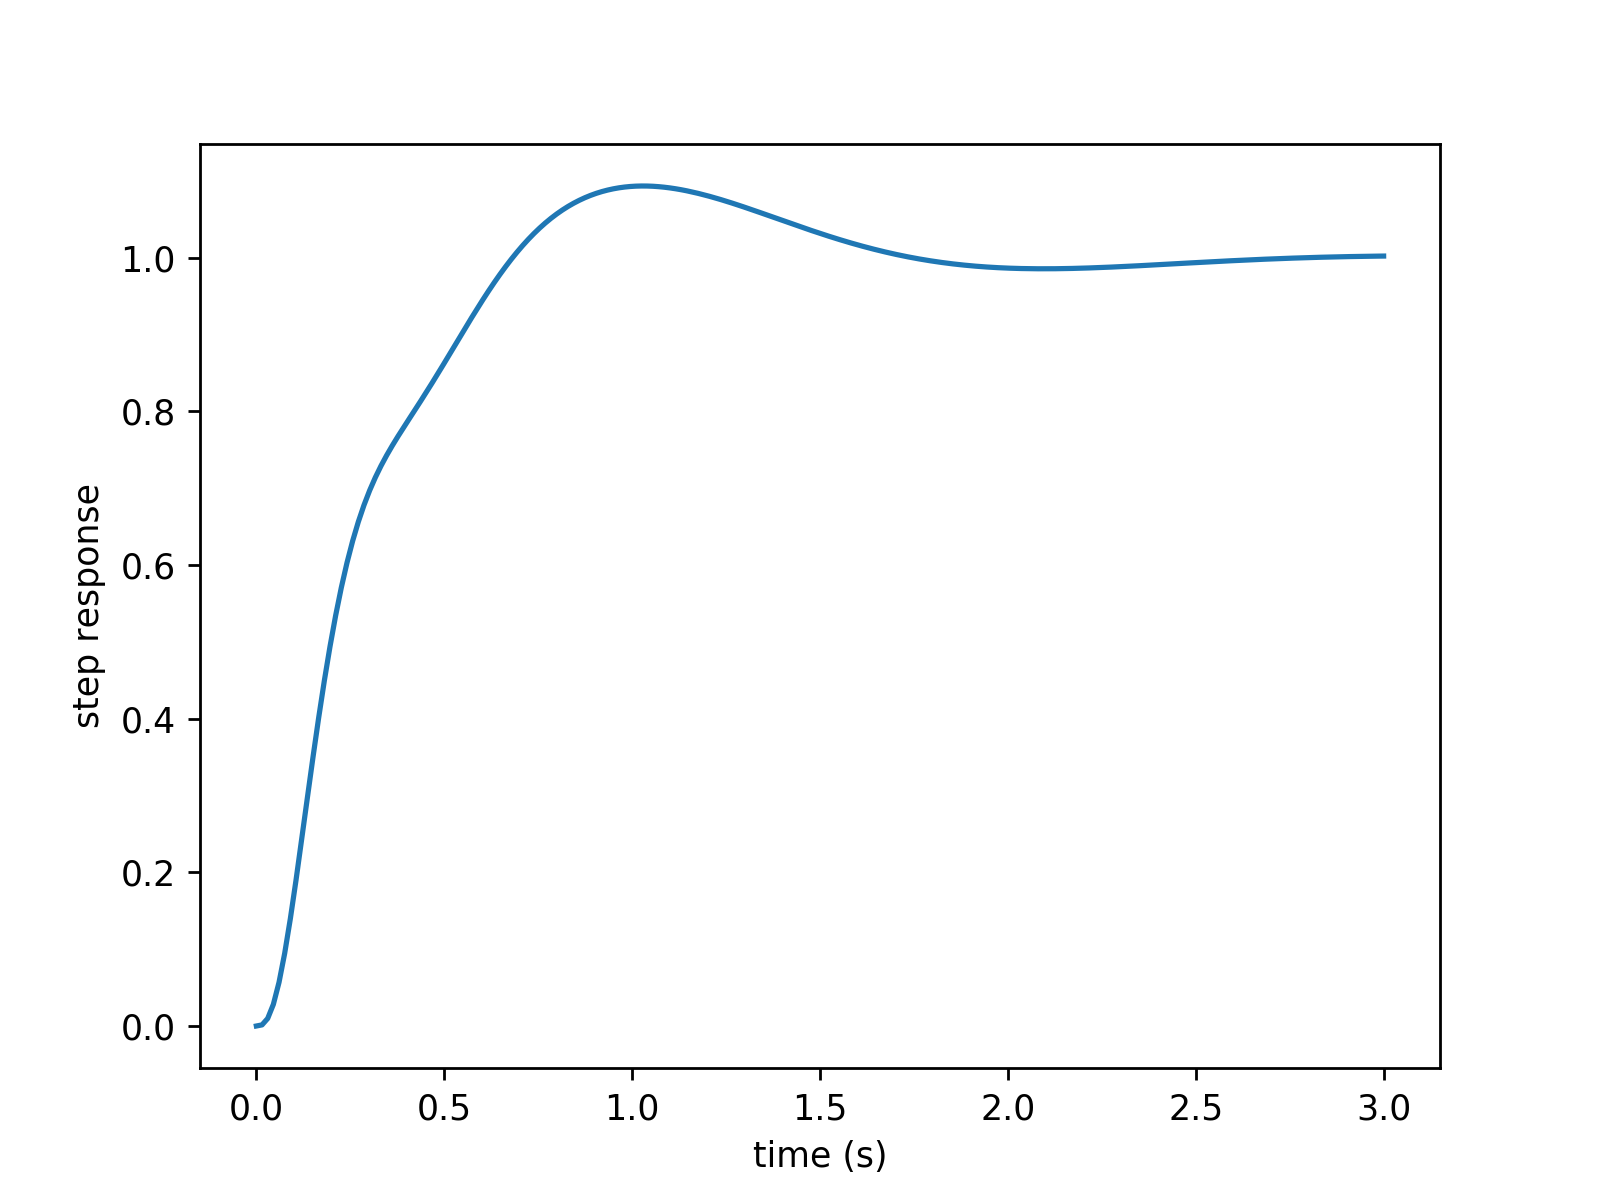

interactive(children=(FloatSlider(value=1.0, description='Kp', max=10.0), FloatSlider(value=0.0, description='…

In [9]:
%matplotlib notebook
t_step = np.linspace(0,3,200)
sys_CL = pid_CL_tf(G_tf,Kp=1)
t_step,y_step = c.step_response(sys_CL, t_step)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(t_step, y_step)
plt.xlabel('time (s)')
plt.ylabel('step response')
plt.show()

def update(Kp = 1.0, Ki = 0.0, Kd = 0.0):
    global sys_CL, t_step
    sys_CL = pid_CL_tf(G_tf,Kp=Kp,Ki=Ki,Kd=Kd)
    t_step,y_step = c.step_response(sys_CL, t_step)
    line.set_ydata(y_step)
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw_idle()

interact(update,Kp=(0.0,10.0),Ki=(0.0,20.0),Kd=(0.0,1.0));

In [39]:


# t_step = np.linspace(0,3,200)


# def step_response(Kp = 1.0, Ki = 0.0, Kd = 0.0):
#     global t_step, G_tf
#     s = c.TransferFunction.s
#     C_tf = Kp + Ki/s + Kd*s
#     sys_forward = C_tf*G_tf
#     sys_CL = sys_forward/(1+sys_forward)
#     t_step,y_step = c.step_response(sys_CL, t_step)
#     return y_step

# opts = {
# #     'xlim': (0, 50),
# #     'ylim': (0, 55),
#     'animation_duration': 250,
# }

# nbi.line(
#     t_step, 
#     step_response, 
#     Kp=(0,10),
#     Ki=(0,20),
#     Kd=(0,1),
#     options=opts
# )

In [45]:
# def x_values(n): return np.random.choice(100, n)
# def y_values(xs): return np.random.choice(100, len(xs))

# nbi.scatter(x_values, y_values, n=(0,200))